# Homework 6 - Data Splitting, Decision Trees and Random Forests
This homework will reinforce what you learned about the above classification algorithms by applying them to the pulsar dataset.

You shold have downloaded:
- pulsar.csv

## 0 Load Data
Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.

 You can read more (interesting!) details at ([source](https://archive.ics.uci.edu/ml/datasets/HTRU2)).

`pulsar.csv`  contains statistics from two types of signal from pulsar candidates: 
1. integrated profile (IP) and 
2. dispersion-measure signal-to-noise ratio (DMSNR) curve. 

Run the cell below to see what data we have.

In [1]:
# ---------- DO NOT CHANGE CODE HERE ---------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("pulsar.csv")
display(data)
X = data.iloc[:,:8].to_numpy()
y = data.iloc[:,8].to_numpy()
# --------------------------------------------

,IP_Mean,IP_SD,IP_Kurt,IP_Skew,DMSNR_Mean,DMSNR_SD,DMSNR_Kurt,DMSNR_Skew,Pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## 1 Data Splitting (3 ways)
There are many ways to split the training and test data. Here is a short exercise to learn and compare 3 such ways using `sklearn.model_selection`:
1. `train_test_split`
2. `KFold`
3. `StratifiedShuffleSplit`

**Read and understand** how the 3 methods work by reading the code demostration below.
- You should know what every line of code is doing.

#### Method 1: train_test_split 
Using `sklearn.model_selection.train_test_split`, we split the data into training and test.

In [2]:
# ---------- DO NOT CHANGE CODE HERE ---------
from sklearn.model_selection import train_test_split

X_train_tts, X_test_tts, y_train_tts, y_test_tts = train_test_split(X, y, test_size=1/3, shuffle=False)

n_pulsar_train_tts = (y_train_tts==1).sum() #summing all of the pulsars in the training set
n_pulsar_test_tts = (y_test_tts==1).sum() #summing all of the pulsars in the test set
print("Training Set, Pulsars:", n_pulsar_train_tts, "out of", y_train_tts.shape[0])
print("Test Set    , Pulsars:", n_pulsar_test_tts, "out of", y_test_tts.shape[0])
# --------------------------------------------

Training Set, Pulsars: 1481 out of 11932
Test Set    , Pulsars: 158 out of 5966


#### Method 2: K-Fold
Using `sklearn.model_selection.KFold` on default shuffle settings, we split the data into training and test.

In [3]:
# ---------- DO NOT CHANGE CODE HERE ---------
from sklearn.model_selection import KFold
kf = KFold(n_splits=3) #default: shuffle false 

for i, (train_idx_kf, test_idx_kf) in enumerate(kf.split(X)):
    X_train_kf, y_train_kf = X[train_idx_kf], y[train_idx_kf]
    X_test_kf, y_test_kf = X[test_idx_kf], y[test_idx_kf]

    n_pulsar_train_kf = (y_train_kf==1).sum()
    n_pulsar_test_kf = (y_test_kf==1).sum()
    print("Training Set, Pulsars:", n_pulsar_train_kf, "out of", y_train_kf.shape[0])
    print("Test Set    , Pulsars:", n_pulsar_test_kf, "out of", y_test_kf.shape[0], '\n')
# --------------------------------------------

Training Set, Pulsars: 729 out of 11932
Test Set    , Pulsars: 910 out of 5966 

Training Set, Pulsars: 1068 out of 11932
Test Set    , Pulsars: 571 out of 5966 

Training Set, Pulsars: 1481 out of 11932
Test Set    , Pulsars: 158 out of 5966 



#### Method 3: Stratified Shuffle Split
Using `sklearn.model_selection.StratifiedShuffleSplit`, we split the data into training and test. 

In [4]:
# ---------- DO NOT CHANGE CODE HERE ---------
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=3, test_size=1/3, random_state=0)

X_train_sss, y_train_sss, X_test_sss, y_test_sss = {}, {}, {}, {}
for i, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    X_train_sss[i], y_train_sss[i] = X[train_idx], y[train_idx]
    X_test_sss[i], y_test_sss[i] = X[test_idx], y[test_idx]

    n_pulsar_train = (y_train_sss[i]==1).sum()
    n_pulsar_test = (y_test_sss[i]==1).sum()
    print("Training Set, Pulsars:", n_pulsar_train, "out of", y_train_sss[i].shape[0])
    print("Test Set    , Pulsars:", n_pulsar_test, "out of", y_test_sss[i].shape[0], '\n')
# --------------------------------------------

Training Set, Pulsars: 1093 out of 11932
Test Set    , Pulsars: 546 out of 5966 

Training Set, Pulsars: 1093 out of 11932
Test Set    , Pulsars: 546 out of 5966 

Training Set, Pulsars: 1093 out of 11932
Test Set    , Pulsars: 546 out of 5966 



### 1.1 Discussion (Stratified Shuffle Split)
The number of pulsars in the training and test data for stratified shuffle split are identical.

**Task:**
1. [1 pt] Why are the number of pulsars identical for each stratified shuffle split? (i.e., what does "stratified" mean?)

    **Ans:** "Stratified" means that the data is divided into groups based on certain characteristics of the data. In our case, stratified shuffle split makes sure that the ratio of pulsars in the training and test data remains the same(as the original data set) for each split. This is important because if we have unbalanced data, our splits could give so few of one class that our model is quite inaccurate - stratified shuffle split is generally used when we have unbalanced data.

2. [1 pt] Using the code cell below, verify that the splits themselves are actually not identical. (Tip: use np.all(...), where ... is code you fill in yourself.)

3. [1 pt] Why is the number of pulsars for stratified shuffle split different from those of train_test_split and KFold? A short answer will do.
        
    **Ans:** Stratified shuffle split makes sure that each split has the same number of pulsars, whereas train_test_split and KFold do not. Since train_test_split and KFold are random in terms of how many pulsars in the training/test data, they will almost always have a different number of pulsars than stratified shuffle split.


In [18]:
# TODO Use this cell to verify that all the splits from stratified shuffle split are different

count_false = 0
n_splits = 3  # Number of splits

for i, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    next_split_idx = (i + 1) % n_splits  
    # Calculate the index of split with mod 3 (n_splits) to eventually compare indeces 2 & 0
    if np.all(X_train_sss[i] == X_train_sss[next_split_idx]):
        count_false += 1

if count_false > 0:
    print("Some or all splits are identical")
else:
    print("No splits are identical")

No splits are identical


### 1.2 Discussion (train_test_split and KFold)
There is an identical match between the split for train_test_split and one of the splits for KFold. 

**Task:**
1. [1 pt] Using the code cell below, verify that the split is indeed identical. (Tip: use np.all(...), where ... is code you fill in yourself.)

2. [1 pt] Why does this identical match happen?  What settings or function/method arguments explain the occurence of this match?

    **Ans:** This identical match happens because we set shuffle=False when we ran train_test_split which means instead of randomly choosing 1/3 of the data for our test data, we simply choose the last third of the data. In KFold without shuffling, if we choose 3 folds then we will always have the last third as a test sample at one point and then we will have an identical split with tts.


In [19]:
# TODO Use this cell to verify that one of the splits from train_test_split and KFold are the same

count_false = 0
n_splits = 3  # Number of splits

if np.all(X_train_kf == X_train_tts):
    count_false += 1

if count_false > 0:
    print("Last split is identical")
else:
    print("No splits are identical")        
    

Last split is identical


Note: We are not checking each split in KFold because we actually don't have access to every split of KFold anymore. By the code cell of KFold above, we never create an array of the splits, we just keep replacing them after each iteration of the for loop. Therefore, we only have access to the last split - which ends up working out because that is the identical split.

## 2 Cross Validation

### 2.1 sklearn cross val score
**Task:**
1. [2 pt] Use `sklearn.model_selection.cross_val_score` to perform cross validation on decision tree classifier
    - Define your DecisionTreeClassifier as `clf`.
    - Set `max_depth=9` and `random_state=0` in your DecisionTreeClassifier object.
    - Perform a 3-fold validation in `cross_val_score`.
    - Print the cross validation scores, this should be an array of three elements.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# TODO

clf = DecisionTreeClassifier(max_depth=9, random_state=0)

# Performing 3-fold cross-validation
scores = cross_val_score(clf, X, y, cv=3)

print("Cross-validation scores:", scores)

Cross-validation scores: [0.97536038 0.97234328 0.97385183]


### 2.2 "Manual" cross val score 
**Task:**

Run the code cell below.

Based on the lecture Jupyter notebooks, the code below *should be* what the `cross_val_score` function performs. If it is what `cross_val_score` function is actually performing, we ought to see the same three validation scores printed.

1. [1 pt] Read the documentation for [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Pay attention to the description in the "cv" parameter. Why isn't the code below performing as we expected?

    **Ans:** "If the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used" if CV is an integer. Therefore, the code below is not performing as expected because we were actually using a StratifiedKFold splitting method above instead of a normal KFold method. Stratified KFold guarantees that the number of pulsars is consistent throughout the splitting.

2. [1 pt] Based on what you found was wrong with the code below, make a change to the splitting method (it may not be onethat we have previously discussed before, so read the documentation carefully) and print out the new cross validation scores. Make sure they match the previous cell. You should not need to change anything in the for-loop, just the code before it.

In [21]:
from sklearn.model_selection import StratifiedKFold
k_fold = StratifiedKFold(n_splits=3, shuffle=False)

# ---------- DO NOT CHANGE CODE HERE ---------
for k, (train, test) in enumerate(k_fold.split(X,y)):
    clf.fit(X[train],y[train])
    ypred = clf.predict(X[test])
    print ( clf.score(X[test],y[test]) )
# --------------------------------------------

0.9753603754609453
0.9723432785786121
0.9738518270197788


For Problems 3 and 4, we will use the following stratified shuffle split. Make sure you run the next cell to obtain the correct `X_train`, `y_train`, `X_test`, `y_test`.

In [22]:
# RUN THIS CELL!

# ---------- DO NOT CHANGE CODE HERE ---------
sss = StratifiedShuffleSplit(n_splits=1, test_size=1/3, random_state=0)
for train_idx, test_idx in sss.split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
# --------------------------------------------

## 3 Decision Tree

### 3.1 Train
**Task:**

[5 pt] Fit decision tree classifiers with different depths to the training data using `sklearn.tree.DecisionTreeClassifier`.
- In the decision tree classifier, fix `random_state=0`. 
- Store the accuracy of the prediction on training and test data in the arrays `train_acc_dt` and `test_acc_dt` respectively.
- Let `max_depth` vary from 1, 3, 5, ..., 19, 21. To do this, define array `depths` accordingly and run a for-loop over it.

In [25]:
from sklearn.metrics import accuracy_score

# TODO
depths = np.arange(1, 22, 2)
train_acc_dt = []
test_acc_dt = []

for i, depth in enumerate(depths):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    
    clf.fit(X_train, y_train)  #
    
    # Predict on training data and calculate accuracy
    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_dt.append(train_acc)
    
    # Predict on test data and calculate accuracy
    test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_dt.append(test_acc)
    
#print(train_acc_dt)
#print(test_acc_dt)


### 3.2 Plot
**Task:**

[1 pt] Plot accuracy (test and training as seperate curves) against depth. Run the following cell.

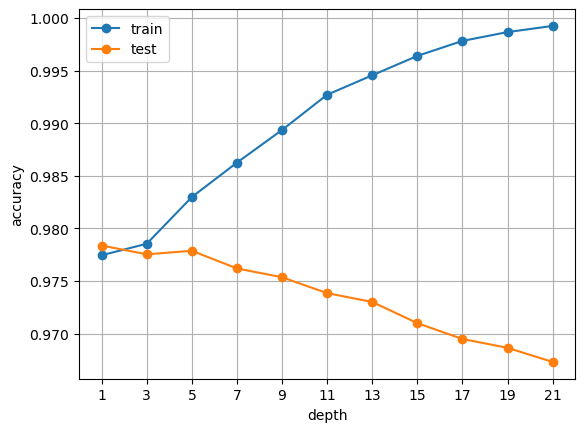

In [26]:
plt.plot(depths, train_acc_dt, 'o-', label='train')
plt.plot(depths, test_acc_dt, 'o-', label='test')
plt.xticks(depths); plt.xlabel('depth'); plt.ylabel('accuracy')
plt.legend(); plt.grid(); plt.show()

### 3.3 Discussion
[2pts] What trends do you observe in the training and test accuracies as depth increases? Explain these trends. 

**Ans:** As the depth increases, training accuracy increases to almost 100% and testing accuracy decreases slightly.
This probably happens due to overfitting, where as the depth increases, we start to capture noise and outliers which leads
to a decrease in the accuracy of our test set.

## 4 Random Forest
### 4.1 Train
**Task:**

[5 pt] Fit random forest classifiers to the training data using `sklearn.ensemble.RandomForestClassifier`. 
- In the random forest classifier, fix `max_depth=3` and `random_state=0`.
- Store the accuracy of the prediction on training and test data in the arrays `train_acc_rf` and `test_acc_rf` respectively.
- Let `n_estimators` vary from 1, 11, 21, ..., 91, 101. To do this, define array `n_ests` accordingly and run a loop over it.

In [27]:
from sklearn.ensemble import RandomForestClassifier

# TODO
n_ests = np.arange(1, 102, 10)
train_acc_rf = []
test_acc_rf = []

for i, n_est in enumerate(n_ests):
    # Create a RandomForestClassifier with fixed max_depth=3, random_state=0, and varying n_estimators
    clf_rf = RandomForestClassifier(n_estimators=n_est, max_depth=3, random_state=0)
    
    # Fit the classifier to the training data
    clf_rf.fit(X_train, y_train)
    
    # Predict on training data and calculate accuracy
    train_pred_rf = clf_rf.predict(X_train)
    train_acc_rf.append(accuracy_score(y_train, train_pred_rf))
    
    # Predict on test data and calculate accuracy
    test_pred_rf = clf_rf.predict(X_test)
    test_acc_rf.append(accuracy_score(y_test, test_pred_rf))


### 4.2 Plot
[1 pt] Plot accuracy (test and training as seperate curves) against number of estimators. Run the following cell.

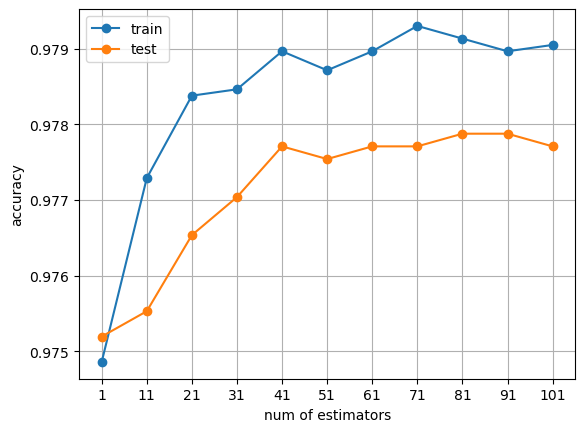

In [28]:
plt.plot(n_ests, train_acc_rf, 'o-', label='train')
plt.plot(n_ests, test_acc_rf, 'o-', label='test')
plt.xticks(n_ests); plt.xlabel('num of estimators'); plt.ylabel('accuracy'); 
plt.legend(); plt.grid(); plt.show()

### 4.3 Discussion
[1 pt] What trends do you observe in the training and test accuracies as `n_estimators` increases? Briefly explain why these trends occured. You are not expected to give an overly detailed response because the exact mechanism of random forest was not covered extensively in lecture.

**Ans:** Both test and train accuracy increase until the number of estimators reaches around 41, then the
accuracy begins to plateau. This could be the case because after a certain point, additional estimators will contribute less and less to the overall predictive power of the model.
